<a href="https://colab.research.google.com/github/prathamshankwalker/Cepheus_Data_Science_Hackathon/blob/main/Cepheus_ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Note : 
Please open the Notebook in Google Colab for visualizations. (Graphs, Heatmaps, plots and interactions of the dataprep report are not visible in GitHub)

---


# Getting the data ready
1. Download the dataset from kaggle.
2. Unzip the data
3. Convert it into a DataFrame

In [1]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"prathamshankwalker","key":"8a6e9c0708de0c160dd3b45dd3fc5064"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c cepheus-23-data-science-hackathon-ps-ii

 95% 261M/274M [00:02<00:00, 79.4MB/s]
100% 274M/274M [00:02<00:00, 110MB/s] 


Installing dataprep for EDA and data visualization

In [ ]:
!pip install dataprep

Importing all the necessary libraries

In [42]:
import pandas as pd
import numpy as np
import zipfile
from dataprep.eda import create_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [5]:
# Unzip/ Extract the data
zip_ref = zipfile.ZipFile("cepheus-23-data-science-hackathon-ps-ii.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [6]:
# Convert data from csv to DataFrame
train_df=pd.read_csv("Train.csv")

Let's see all the columns/variables in our data

In [7]:
train_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'H', 'Diameter', 'Eccentricity (e)',
       'Semi-major axis', 'Inclination', 'om', 'w', 'Mean Anomaly',
       'Aphelion distance', 'Mean distance', 'tp_r', 'tp', 'tp_cal', 'per',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms',
       'Hazard_rate'],
      dtype='object')

Visualization of first 10 rows

In [8]:
train_df.head(10)

Unnamed: 0       ID           Name          H   Diameter  Eccentricity (e)  \
0           0  1373446  ASTRD_1373446  16.800000  66.678797          0.126741   
1           1  1167163  ASTRD_1167163  13.600000  43.978074          0.068699   
2           2  1561386  ASTRD_1561386  16.200000  54.297412          0.058680   
3           3  1530781  ASTRD_1530781  18.758000  64.450052          0.190161   
4           4  1332617  ASTRD_1332617  16.500000  55.488104          0.313855   
5           5  1819911  ASTRD_1819911  13.400000  43.184279          0.063653   
6           6  1900448  ASTRD_1900448  19.382004  66.926709          0.354168   
7           7  1620764  ASTRD_1620764  17.400000  59.060183          0.152674   
8           8  1264410  ASTRD_1264410  21.403699  84.950770          0.681734   
9           9  1034570  ASTRD_1034570  18.400000  63.029159          0.136946   

   Semi-major axis  Inclination          om           w  ...   sigma_i  \
0         2.485660     3.143874  120.677652  117.882909  ...  0.000007   
1         5.179780    13.167953   47.895421  274.408421  ...  0.000010   
2         3.160177    10.633791  112.361130  156.006162  ...  0.000007   
3         2.332643     1.312655  250.220200  140.158954  ...  0.000010   
4         2.334281     3.649729  220.810491  132.313188  ...  0.000005   
5         2.653200    15.995271   78.357367   87.568328  ...  0.000005   
6         1.204474     7.411448  281.074312  216.683854  ...  0.000005   
7         2.714073     4.764466    2.444396   63.094902  ...  0.000008   
8         2.055436     9.663249  172.227235  182.795573  ...  0.000955   
9         2.336999     0.958229  323.102234  246.996699  ...  0.000024   

   sigma_om   sigma_w  sigma_ma      sigma_ad       sigma_n  sigma_tp  \
0  0.000082  0.000088  0.000033  1.929900e-08  2.599500e-09  0.000133   
1  0.000038  0.000137  0.000145  2.785400e-07  6.310200e-09  0.001791   
2  0.000048  0.000095  0.000096  1.408800e-07  1.108200e-08  0.000531   
3  0.000367  0.000370  0.000040  2.546700e-08  3.806700e-09  0.000145   
4  0.000086  0.000087  0.000015  1.674700e-08  2.263600e-09  0.000051   
5  0.000017  0.000045  0.000042  1.548600e-08  1.877200e-09  0.000185   
6  0.000066  0.000067  0.000018  6.675919e-09  4.517349e-09  0.000024   
7  0.000072  0.000080  0.000030  3.352400e-08  3.543200e-09  0.000138   
8  0.001037  0.001100  0.184515  4.449462e-04  6.901993e-05  0.511727   
9  0.000345  0.000367  0.000125  3.482400e-08  5.423600e-09  0.000458   

   sigma_per       rms   Hazard_rate  
0   0.000015  0.574340  2.343475e-10  
1   0.000325  0.654830  8.551449e-01  
2   0.000130  0.582430  2.765159e+00  
3   0.000018  0.457380  2.321385e-10  
4   0.000011  0.563560  8.146003e-02  
5   0.000013  0.456480  2.801565e-02  
6   0.000003  0.486322  2.412606e-10  
7   0.000026  0.522180  8.146003e-02  
8   0.236693  0.398727  2.925326e-08  
9   0.000026  0.699640  1.685333e+00  

[10 rows x 30 columns]

Let's Check if there are any missing values

In [9]:
train_df.isna().sum()

Unnamed: 0             0
ID                     0
Name                   0
H                      0
Diameter             954
Eccentricity (e)       0
Semi-major axis        0
Inclination            0
om                   954
w                    954
Mean Anomaly           0
Aphelion distance    954
Mean distance          0
tp_r                 954
tp                     0
tp_cal                 0
per                    0
sigma_e                0
sigma_a              954
sigma_q              954
sigma_i                0
sigma_om               0
sigma_w                0
sigma_ma             954
sigma_ad               0
sigma_n                0
sigma_tp               0
sigma_per            954
rms                    0
Hazard_rate            0
dtype: int64

Drop the rows with missing values

In [10]:
train_df=train_df.dropna()

## Exploratory Data Analysis (EDA) and Visualization

DataPrep Report
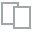
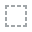
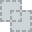
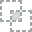
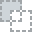
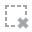
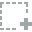
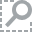
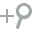
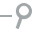
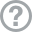
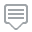
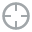
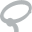
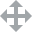
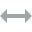
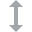
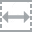
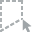
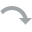
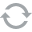
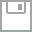
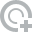
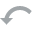
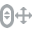
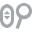
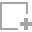
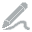
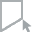
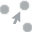
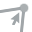
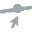

In [11]:
create_report(train_df)

## Observations
- There are no duplicate rows in the data
- Most of the variables have a skewed distribution
- All sigma values have a highly positive correlation with Hazard_rate


### Creating the training Data ;
1. X - features
2. y - label (Hazard_rate)

Removing unwanted columns

In [12]:
X=train_df.drop(['Unnamed: 0','Name','ID','Hazard_rate'],axis=1)

In [13]:
# creating the label 
y=train_df['Hazard_rate']

**Splitting the data into training and testing**
1. Random state = 42
2. Test size = 20%

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

## Creating and fitting the model
- Using GradientBoostedRegressor in scikit learn
- Arguments : n_estimators= 180, max_depth= 4, min_samples_split=5, learning_rate=0.01, loss=squared_error, verbose=1
- Doesn't require the data to be standardized/normalized

In [15]:

regressor=GradientBoostingRegressor(
                                      n_estimators=180,
                                      max_depth=4,
                                      min_samples_split=5,
                                      learning_rate=0.01,
                                      loss="squared_error",
                                      verbose=1
                                    )

regressor.fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1      190293.0612           44.07m
         2      186538.2879           43.26m
         3      182858.2346           43.21m
         4      179251.4144           43.23m
         5      175716.3699           43.02m
         6      172251.6727           42.75m
         7      168855.9231           42.60m
         8      165527.7488           42.49m
         9      162265.8053           42.28m
        10      159063.1562           42.11m
        20      130356.6151           39.93m
        30      106858.2752           38.26m
        40       87622.1647           36.12m
        50       71873.2816           33.88m
        60       58975.6769           31.39m
        70       48420.3956           28.84m
        80       39772.0692           26.24m
        90       32689.2591           23.38m
       100       26883.0298           20.62m


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=180, verbose=1)

Lets predict on the Test Data and find the RMSE score

In [26]:
preds=regressor.predict(x_test)

In [43]:
RMSE = np.sqrt(mean_squared_error(y_test, preds,squared=False))
print(f"Root Mean Squared Error is : {RMSE}")

Root Mean Squared Error is : 15.333767624203709


Let's get the test data and predict on it

In [30]:
test_df=pd.read_csv("Test.csv")

Let's get the test data in the same shape of training data 
- Drop the 'Unnamed: 0','Name','ID' columns

In [17]:
test=test_df.drop(['Unnamed: 0','Name','ID'],axis=1)

Predict on the test data

In [18]:
pred=regressor.predict(test)

Let's see the first 10 predictions

In [32]:
for i in range(10):
  print(f"Prediction {i+1} = {pred[i]}")

Prediction 1 = 1.525443617397849
Prediction 2 = 1.525443617397849
Prediction 3 = 1.525443617397849
Prediction 4 = 1.525443617397849
Prediction 5 = 1.525443617397849
Prediction 6 = 1.525443617397849
Prediction 7 = 1.525443617397849
Prediction 8 = 1.525443617397849
Prediction 9 = 1.525443617397849
Prediction 10 = 1.525443617397849


**Observation** : 
All the predictions are same ,which basically represents the submission file (in which all predictions are 0)

## Getting the submission file ready
- The sample submission file contains two columns 'ID' and 'Hazard_rate'
- The values in Hazard_rates have to be same for all rows

In [34]:
# converting the array of predictions into a DataFrame with Hazard_rate as column
pred_df=pd.DataFrame(pred,columns=['Hazard_rate'])

In [35]:
# visualizing our prediction dataframe
pred_df.head(10)

Hazard_rate
0     1.525444
1     1.525444
2     1.525444
3     1.525444
4     1.525444
5     1.525444
6     1.525444
7     1.525444
8     1.525444
9     1.525444

In [36]:
# Making a copy just to be safe
df2=pred_df 

In [37]:
# Adding the ID Column as per our sample submission file

df2['ID']=np.arange(0,len(test_df))
df2=df2.set_index('ID')

In [39]:
# Lets see the first 10 rows of our submission dataframe
df2.head(10)

Hazard_rate
ID             
0      1.525444
1      1.525444
2      1.525444
3      1.525444
4      1.525444
5      1.525444
6      1.525444
7      1.525444
8      1.525444
9      1.525444

Our submission file is ready , we just need to convert it into csv format and upload it

**Converting DataFrame into csv format for submission**

In [23]:
df2.to_csv("submission_1.csv")